## Requirements env + moduls

In [1]:
import pytesseract as tess
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

	

from PIL import Image, ImageDraw
import cv2 as cv

In [3]:


img_size = (224, 224, 3) 
img = sorted(glob(r'/kaggle/input/birdies/images/*'))
label = sorted(glob(r'/kaggle/input/birdies/labels/*'))
images = img[:3]
label = label[:3]



BG (2016, 448, 3)
C 212 215
(224, 224, 3)
0.10533929249596974 0.4811335972377232 0.07427300347222222 0.448486328125
100 324 103 327


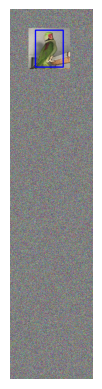

<Figure size 640x480 with 0 Axes>

In [39]:
def ShowImage(BG, xmin, ymin, xmax, ymax):
    plt.axis('off')
    #plt.figure(figsize=(5,5))
    cv.rectangle(BG, (xmin, ymin), (xmax, ymax), (0,0,255), 6) # рисуем прямоугольник на картинки
    plt.imshow(BG)
    plt.show()


class BOX():

    def __init__(self, scale_w, scale_h, image_size, img, label):
        self.scale_w = scale_w
        self.scale_h = scale_h
        self.image_size = image_size
        self.img = img
        self.label = label
        self.BG, self.coordinates = self.box_generator()


    def get_box(self): 
    # оптимизировано для диапазона чисел не более 2^16
        with open(self.label) as f: # открытие файлов в ириктории
            line=f.readline()    
        box_params = line.split() # разделяем числа по пробелу
        xc = np.float16(box_params[1])  # центр картинки по x
        yc = np.float16(box_params[2])    # центр картинки по y 
        
        bw = np.float16(box_params[3])  # ширина
        bh = np.float16(box_params[4])  # высота
        return xc, yc, bw, bh
    
    def box_generator(self):
        coordinates = [0]
    
        BG = np.random.randint(low=0,high=256,size=self.image_size[0]*self.scale_w*self.image_size[1]*self.scale_h*self.image_size[2], dtype=np.uint16)
        BG = BG.reshape(self.image_size[0]*self.scale_w, self.image_size[1]*self.scale_h,self.image_size[2])
        print('BG', BG.shape)
        y_c= np.random.choice(range(np.int32(self.image_size[0]/2+7),np.int32(BG.shape[0]-self.image_size[0]/2)-7)) ##!!!!
        x_c = np.random.choice(range(np.int32(self.image_size[1]/2+7),np.int32(BG.shape[1]-self.image_size[1]/2)-7))
        print('C', x_c, y_c)
        IMG = Image.open(self.img)
        IMG = IMG.resize((self.image_size[0],self.image_size[1]))
        IMG = np.asarray(IMG)
        print(IMG.shape)
        xc, yc, bw, bh = self.get_box()
        x_min_img, x_max_img, y_min_img, y_max_img = x_c-int(self.image_size[0]/2), x_c+int(self.image_size[0]/2), y_c-int(self.image_size[1]/2), y_c+int(self.image_size[1]/2)
        xc, yc, bw, bh = ((x_min_img+x_max_img)/2+xc)/(self.image_size[0]*self.scale_w), ((y_min_img+y_max_img)/2+yc)/(self.image_size[1]*self.scale_h), bw/self.scale_w, bh/self.scale_h
        print( xc, yc, bw, bh)
        print( x_min_img, x_max_img, y_min_img, y_max_img)
        BG[y_min_img:y_max_img, x_min_img:x_max_img] = IMG
 
        coordinates.append(xc)
        coordinates.append(yc)
        coordinates.append(bw)
        coordinates.append(bh)
    
        return BG, coordinates

    def drow_new_box(self):
  
        xc = np.float16(self.coordinates[1])* self.image_size[1]*self.scale_w # center x
        yc = np.float16(self.coordinates[2])* self.image_size[0]*self.scale_h   # center y    
        bw = np.float16(self.coordinates[3])* self.image_size[1]*self.scale_w # width 
        bh = np.float16(self.coordinates[4])* self.image_size[0]*self.scale_h  # высота
    
       
        xmin = np.int16((xc - bw/2)) # 
        xmax = np.int16((xc + bw/2))
        ymin = np.int16((yc - bh/2)) # отложим от центра половину длины вправо и влево
        ymax = np.int16((yc + bh/2))
        ShowImage(self.BG, xmin, ymin, xmax, ymax)
        plt.tight_layout()
        plt.show()

        
        

        
s = (224,224,3)
a = BOX(9,2, s, images[0], label[0])
a.coordinates
a.drow_new_box()
        

In [44]:

 
def gradient_up_bottom(color, size):
    new_color = (0, 0, 0)
    new_image = Image.new("RGB", (size[0], size[1]), new_color)
    draw = ImageDraw.Draw(new_image)
    if color.lower() == 'r':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=(i // 2, 0, 0), width=1)
    if color.lower() == 'g':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=(0, i // 2, 0), width=1)
    if color.lower() == 'b':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=(0, 0, i // 2), width=1)

    if color.lower() == 'y':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=(i // 2, i // 2, 0), width=1)

    if color.lower() == 'lb':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=( 0, i // 2, i // 2), width=1)

    if color.lower() == 'p':
        for i in range(size[1]):
            draw.line((i, 0, i, size[0]-1), fill=( i // 2, 0, i // 2), width=1)
            
            
    return new_image       
    #new_image.save("res.png", "PNG")

a = gradient_up_bottom('y', (200,200))

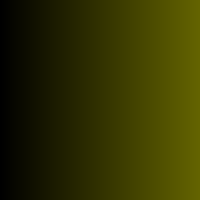

In [45]:
a 

In [ ]:
def grad():
    grad = []
    for i in range(s):
        r = int()

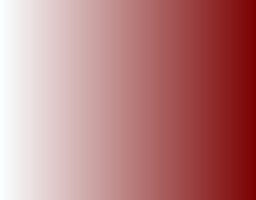

In [138]:
from PIL import Image, ImageDraw
 
 
def gradient(color):
    new_color = (0, 0, 0)
    new_image = Image.new("RGB", (256, 200), new_color)
    draw = ImageDraw.Draw(new_image)
    if color.lower() == 'r':
        for i, k in zip(range(256), range(0,256)):
            draw.line((i, 0, i, 199), fill=(250-i // 2, 256-k, 256-k), width=1)
    if color.lower() == 'p':
        for i in range(512):
            draw.line((i, 0, i, 199), fill=(240, i // 2, 240), width=1)
    if color.lower() == 'y':
        for i in range(0,512):
            draw.line((i, 0, i, 199), fill=(240, 240, i //3), width=1)
    return new_image 

gradient('r')

In [91]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))

In [92]:
colors

[<Color red>,
 <Color #f13600>,
 <Color #e36500>,
 <Color #d58e00>,
 <Color #c7b000>,
 <Color #a4b800>,
 <Color #72aa00>,
 <Color #459c00>,
 <Color #208e00>,
 <Color green>]

In [ ]:
for i in tqdm(range(0,len(files), total = len(files)):

In [82]:
from PIL import Image, ImageDraw

BLACK, DARKGRAY, GRAY = ((0,0,0), (63,63,63), (127,127,127))
LIGHTGRAY, WHITE = ((191,191,191), (255,255,255))
BLUE, GREEN, RED = ((0, 0, 255), (0, 255, 0), (255, 0, 0))
BLUE, GREEN, RED = ((0, 0, 255), (0, 255, 0), (255, 0, 0))

class Point(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

class Rect(object):
    def __init__(self, x1, y1, x2, y2):
        minx, maxx = (x1,x2) if x1 < x2 else (x2,x1)
        miny, maxy = (y1,y2) if y1 < y2 else (y2,y1)
        self.min = Point(minx, miny)
        self.max = Point(maxx, maxy)

    width  = property(lambda self: self.max.x - self.min.x)
    height = property(lambda self: self.max.y - self.min.y)


def gradient_color(minval, maxval, val, color_palette):
    """ Computes intermediate RGB color of a value in the range of minval
        to maxval (inclusive) based on a color_palette representing the range.
    """
    max_index = len(color_palette)-1
    delta = maxval - minval
    if delta == 0:
        delta = 1
    v = float(val-minval) / delta * max_index
    i1, i2 = int(v), min(int(v)+1, max_index)
    (r1, g1, b1), (r2, g2, b2) = color_palette[i1], color_palette[i2]
    f = v - i1
    return int(r1 + f*(r2-r1)), int(g1 + f*(g2-g1)), int(b1 + f*(b2-b1))

def horz_gradient(draw, rect, color_func, color_palette):
    minval, maxval = 1, len(color_palette)
    delta = maxval - minval
    width = float(rect.width)  # Cache.
    for x in range(rect.min.x, rect.max.x+1):
        f = (x - rect.min.x) / width
        val = minval + f * delta
        color = color_func(minval, maxval, val, color_palette)
        draw.line([(x, rect.min.y), (x, rect.max.y)], fill=color)

def vert_gradient(draw, rect, color_func, color_palette):
    minval, maxval = 1, len(color_palette)
    delta = maxval - minval
    height = float(rect.height)  # Cache.
    for y in range(rect.min.y, rect.max.y+1):
        f = (y - rect.min.y) / height
        val = minval + f * delta
        color = color_func(minval, maxval, val, color_palette)
        draw.line([(rect.min.x, y), (rect.max.x, y)], fill=color)




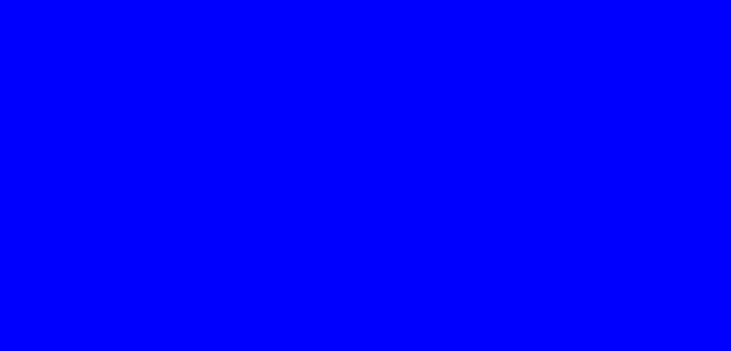

In [87]:

# Draw a three color vertical gradient.
color_palette = [BLUE]
region = Rect(0, 0, 730, 350)
width, height = region.max.x+1, region.max.y+1
image = Image.new("RGB", (width, height), WHITE)
draw = ImageDraw.Draw(image)
vert_gradient(draw, region, gradient_color, color_palette)
image
#image.save("vert_gradient.png", "PNG")
#print('image saved')

In [81]:
from PIL import Image
import math


BLACK, DARKGRAY, GRAY = ((0,0,0), (63,63,63), (127,127,127))
LIGHTGRAY, WHITE = ((191,191,191), (255,255,255))
BLUE, GREEN, RED = ((0, 0, 255), (0, 255, 0), (255, 0, 0))


class Point(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

    def rot_x(self, degrees):
        radians = math.radians(degrees)
        return self.x * math.cos(radians) + self.y * math.sin(radians)


class Rect(object):
    def __init__(self, x1, y1, x2, y2):
        minx, maxx = (x1,x2) if x1 < x2 else (x2,x1)
        miny, maxy = (y1,y2) if y1 < y2 else (y2,y1)
        self.min = Point(minx, miny)
        self.max = Point(maxx, maxy)

    def min_max_rot_x(self, degrees):
        first = True
        for x in [self.min.x, self.max.x]:
            for y in [self.min.y, self.max.y]:
                p = Point(x, y)
                rot_d = p.rot_x(degrees)
                if first:
                    min_d = rot_d
                    max_d = rot_d
                else:
                    min_d = min(min_d, rot_d)
                    max_d = max(max_d, rot_d)
                first = False
        return min_d, max_d

    width  = property(lambda self: self.max.x - self.min.x)
    height = property(lambda self: self.max.y - self.min.y)


def gradient_color(minval, maxval, val, color_palette):
    """ Computes intermediate RGB color of a value in the range of minval
        to maxval (inclusive) based on a color_palette representing the range.
    """
    max_index = len(color_palette)-1
    delta = maxval - minval
    if delta == 0:
        delta = 1
    v = float(val-minval) / delta * max_index
    i1, i2 = int(v), min(int(v)+1, max_index)
    (r1, g1, b1), (r2, g2, b2) = color_palette[i1], color_palette[i2]
    f = v - i1
    return int(r1 + f*(r2-r1)), int(g1 + f*(g2-g1)), int(b1 + f*(b2-b1))


def degrees_gradient(im, rect, color_func, color_palette, degrees):
    minval, maxval = 1, len(color_palette)
    delta = maxval - minval
    min_d, max_d = rect.min_max_rot_x(degrees)
    range_d = max_d - min_d
    for x in range(rect.min.x, rect.max.x + 1):
        for y in range(rect.min.y, rect.max.y+1):
            p = Point(x, y)
            f = (p.rot_x(degrees) - min_d) / range_d
            val = minval + f * delta
            color = color_func(minval, maxval, val, color_palette)
            im.putpixel((x, y), color)


def gradient_image(color_palette, degrees):
    region = Rect(0, 0, 600, 400)
    width, height = region.max.x+1, region.max.y+1
    image = Image.new("RGB", (width, height), WHITE)
    degrees_gradient(image, region, gradient_color, color_palette, -degrees)
    return image